<h1> Gradient Descent from Scratch, Tutorial 2, Introduction to AI </h1>
<h2> Gradient Descent is used to solve different optimazation problems in machine learning.</h2>
<h3> The idea is to minimize the gradient of the loss-function. </h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h2> In the excercise we are given the following Lossfunction: $ E(w) = 6*w^2 -5 $ <br> 
    This loss-function calculates the prediction error for a specific parameter:  $w$ </h2>
    <h2> We can plot the curve of the loss-function with the following code: </h2>

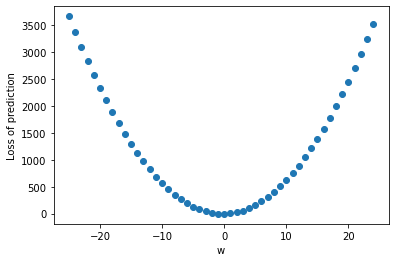

In [2]:
x_values = []
y_values=[]
for i in range(-25, 25):
    x_values.append(i)
    y_values.append( 6*(i**2)+ 3*i -5)
plt.xlabel("w")
plt.ylabel("Loss of prediction")
plt.plot(x_values, y_values, linestyle='none', marker='o')
plt.show()

<h2> By looking at the plot we can already tell that the ideal Parameter $w$ must be somewhere between ~ -2 and 2.<br>
However to calculate the ideal value for $w$ with precision we have to use the gradient descent algorithm which works like this: <br>
</h2> 

<h3>  <br> <br>
    1) Initialize a starting value for the paramameter $w$ <br> <br>
    2) Initialize a suitable learning rate [0, 1) <br> <br>
    3) Calculate the derivative of the error-function with respect to the parameter $w$: <br>  $E(w) = 6*w^2 -5$ -> $E´(w)= 12*w+3$<br> <br>
    4) Insert current value of $w$  and calculate the derivative <br> <br>
    5) Calculate the step size -> $w$ * learning rate <br> <br>
    6) Increase or decrease $w$ by step size depending on if the derivative is positive or negative <br> <br>
    7) Repeat process till derivative of the loss-function converge to zero or max_iterations have been reached <br> <br>
    </h3>

Learning Rate, recommended -> 0.1: 0.1
Enter Starting Parameter: 10
Enter max iterations: 20
Optimal Parameter at: -0.25


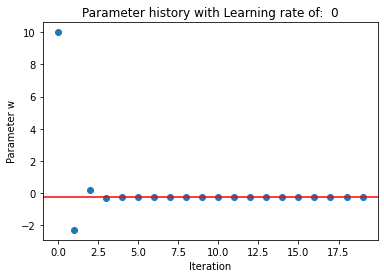

Print data history? [yes] = y [no] = n:     y
****************DATA HISTORY**************** 
 

Parameter history: [10.0, -2.3, 0.16, -0.332, -0.234, -0.253, -0.249, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25]

Loss History: [123.0, -24.6, 4.92, -0.984, 0.197, -0.039, 0.008, -0.002, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0]

Step-Size History: [12.3, -2.46, 0.492, -0.098, 0.02, -0.004, 0.001, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0]



In [4]:
#Aufgabe 10 Nr 4

#Arrays to save parameters and result history
parameter_history = []
slope_history = []
step_size_history = []
learning_rate = 0


#calculates the current stepsize, if big error = big step size, if small error = small step size
def calc_Stepsize(slope, learning_rate):
    step_size_history.append(round(slope*learning_rate,3))
    return slope * learning_rate
    

def gradient_descent():
    learning_rate = float(input("Learning Rate, recommended -> 0.1: "))
    w =  float (input("Enter Starting Parameter: "))
    max_iterations = int(input("Enter max iterations: "))
    for i in range(max_iterations):
        loss_function = 12*w+3
        slope = loss_function 
        slope_history.append(round(loss_function,3))
        parameter_history.append(round(w,3))
        w = w - calc_Stepsize(slope, learning_rate)
    print("Optimal Parameter at: " + str(round(w,3)))
    plot_loss_history()
    print_history = input("Print data history? [yes] = y [no] = n:     ")
    if((print_history.lower())=='y'):
        print_data_history()
    
def print_data_history():
    print("****************DATA HISTORY**************** \n \n")
    print("Parameter history: " + str(parameter_history) +"\n")
    print("Loss History: " +  str(slope_history)+"\n")
    print("Step-Size History: " + str(step_size_history) + "\n")


def plot_loss_history():
    fig, ax = plt.subplots()
    ax.scatter(range(0, len(parameter_history)), parameter_history)
    plt.axhline(y=-0.25, color='r', linestyle='-')
    plt.title("Parameter history with Learning rate of:  " + str(learning_rate))
    plt.ylabel("Parameter w")
    plt.xlabel("Iteration")
    plt.show()

gradient_descent()

<h3> The algorithmn states that the prediction loss is minimal at -0.25 for $w$.<br> <br> Looking at the plot you can see how the parameter is leveling itself off, closer to -0.25 by each iterations. <br> 
Picking a suitable learning rate is really import since a learning rate which is too high will lead to an overshoot of the parameter. A learning rate of $0.2$ would already be too high, which gets proven by the following plot:</h3>

Optimal Parameter at: 93.758


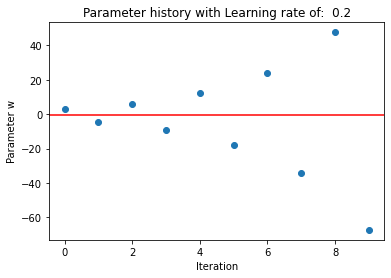

Print data history? [yes] = y [no] = n:     y
****************DATA HISTORY**************** 
 

Parameter history: [3, -4.8, 6.12, -9.168, 12.235, -17.729, 24.221, -34.509, 47.713, -67.398]

Loss History: [39, -54.6, 76.44, -107.016, 149.822, -209.751, 293.652, -411.113, 575.558, -805.781]

Step-Size History: [7.8, -10.92, 15.288, -21.403, 29.964, -41.95, 58.73, -82.223, 115.112, -161.156]



In [5]:
#Aufgabe 10 Nr 4

#Arrays to save parameters and result history
parameter_history = []
slope_history = []
step_size_history = []

learning_rate = 0.2



#calculates the current stepsize, if big error = big step size, if small error = small step size
def calc_Stepsize(slope, learning_rate):
    step_size_history.append(round(slope*learning_rate,3))
    return slope * learning_rate
    

def gradient_descent():
    w =  3
    max_iterations = 10
    for i in range(max_iterations):
        loss_function = 12*w+3
        slope = loss_function 
        slope_history.append(round(loss_function,3))
        parameter_history.append(round(w,3))
        w = w - calc_Stepsize(slope, learning_rate)
    print("Optimal Parameter at: " + str(round(w,3)))
    plot_loss_history()
    print_history = input("Print data history? [yes] = y [no] = n:     ")
    if((print_history.lower())=='y'):
        print_data_history()
    
def print_data_history():
    print("****************DATA HISTORY**************** \n \n")
    print("Parameter history: " + str(parameter_history) +"\n")
    print("Loss History: " +  str(slope_history)+"\n")
    print("Step-Size History: " + str(step_size_history) + "\n")


def plot_loss_history():
    fig, ax = plt.subplots()
    ax.scatter(range(0, len(parameter_history)), parameter_history)
    plt.axhline(y=-0.25, color='r', linestyle='-')
    plt.title("Parameter history with Learning rate of:  " + str(learning_rate))
    plt.ylabel("Parameter w")
    plt.xlabel("Iteration")
    plt.show()

gradient_descent()